c:\Users\66891\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[LightGBM] [Info] Number of positive: 5924, number of negative: 143676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 149600, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039599 -> initscore=-3.188549
[LightGBM] [Info] Start training from score -3.188549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

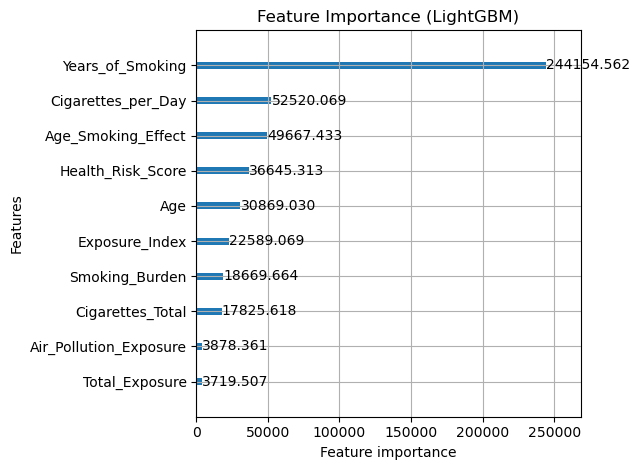

c:\Users\66891\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


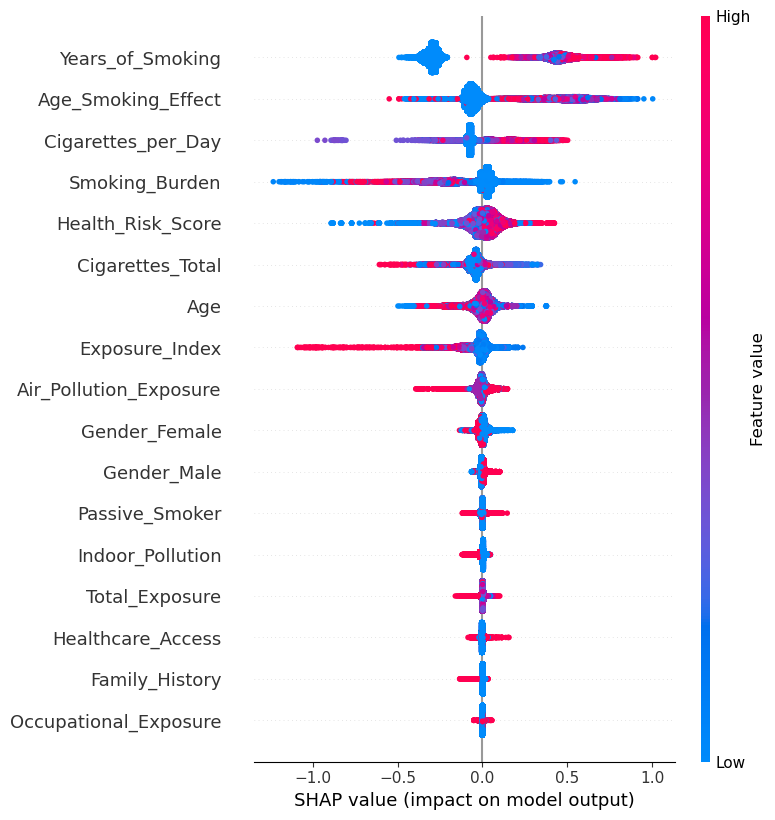

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import shap

df = pd.read_csv('learning_set.csv')
df.head()

# Zakładamy, że kolumna celu nazywa się:
target_column = 'Lung_Cancer_Diagnosis'

X = df.drop(columns=[target_column])
y = df[target_column]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,        # zachowujemy proporcje klas!
    random_state=42
)

# Najlepsze parametry po tuningu (wstaw swoje!)
params = {'learning_rate': 0.040508599074438406,
                'max_depth': 6,
                  'num_leaves': 62,
                    'min_child_samples': 22,
                      'n_estimators': 108,
                        'subsample': 0.6866626928243572,
                          'colsample_bytree': 0.7605951843068885,
                            'reg_alpha': 0.5893279541357952,
                              'reg_lambda': 0.8563926001105232,
    'is_unbalance': True,  # pamiętaj o tym!
    'random_state': 42
}

model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train)

# Feature importance
lgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Feature Importance (LightGBM)")
plt.tight_layout()
plt.show()

# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)
